<a href="https://colab.research.google.com/github/kevinwanyama/sentiment_analysis_100k_pilani_tweets/blob/main/kevin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud
!pip install gensim
!pip install nltk
!pip install tensorflow

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [3]:
pilani_df = pd.read_csv('Sentiment_Dataset.csv',encoding='ISO-8859-1')

In [4]:
pilani_df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [5]:
pilani_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [6]:
pilani_df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [7]:
pilani_df['Sentiment'].nunique()

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


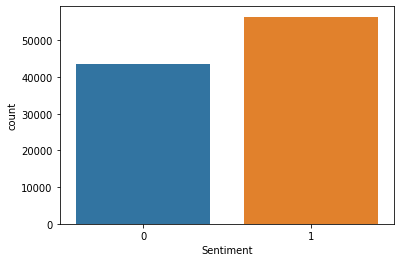

In [8]:
sns.countplot(pilani_df['Sentiment'])

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punc(message):
    punc_removed = [char for char in message if char not in string.punctuation]
    punc_removed_join = ''.join(punc_removed)

    return punc_removed_join

In [11]:
pilani_df['SentimentText without Punctuation'] = pilani_df['SentimentText'].apply(remove_punc)

In [12]:
pilani_df

,ItemID,Sentiment,SentimentText,SentimentText without Punctuation
0,1,0,is so sad for my APL frie...,is so sad for my APL friend
1,2,0,I missed the New Moon trail...,I missed the New Moon trailer
2,3,1,omg its already 7:30 :O,omg its already 730 O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT
...,...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...,Cupcake seems like a repeating problem hope...
99985,99997,1,@cupcake__ arrrr we both replied to each other...,cupcake arrrr we both replied to each other ov...
99986,99998,0,@CuPcAkE_2120 ya i thought so,CuPcAkE2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,CupcakeDollie Yes Yes Im glad you had more fun...


In [13]:
#remove stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
# Remove stopwords and remove short words that are less than 2 characters.
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [16]:
pilani_df['SentimentText Without Punc & Stopwords']=pilani_df['SentimentText without Punctuation'].apply(preprocess)

In [17]:
pilani_df

,ItemID,Sentiment,SentimentText,SentimentText without Punctuation,SentimentText Without Punc & Stopwords
0,1,0,is so sad for my APL frie...,is so sad for my APL friend,"[sad, apl, friend]"
1,2,0,I missed the New Moon trail...,I missed the New Moon trailer,"[missed, new, moon, trailer]"
2,3,1,omg its already 7:30 :O,omg its already 730 O,"[omg, already]"
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...,"[omgaga, sooo, gunna, cry, ive, dentist, since..."
4,5,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT,"[think, cheating]"
...,...,...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...,Cupcake seems like a repeating problem hope...,"[cupcake, seems, like, repeating, problem, hop..."
99985,99997,1,@cupcake__ arrrr we both replied to each other...,cupcake arrrr we both replied to each other ov...,"[cupcake, arrrr, replied, different, tweets, t..."
99986,99998,0,@CuPcAkE_2120 ya i thought so,CuPcAkE2120 ya i thought so,"[cupcake, thought]"
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,CupcakeDollie Yes Yes Im glad you had more fun...,"[cupcakedollie, yes, yes, glad, fun]"


In [18]:
#joining cleaned text into a string to create a word cloud.
pilani_df['Joined_clean_SentimentText'] = pilani_df['SentimentText Without Punc & Stopwords'].apply(lambda x: " ".join(x))

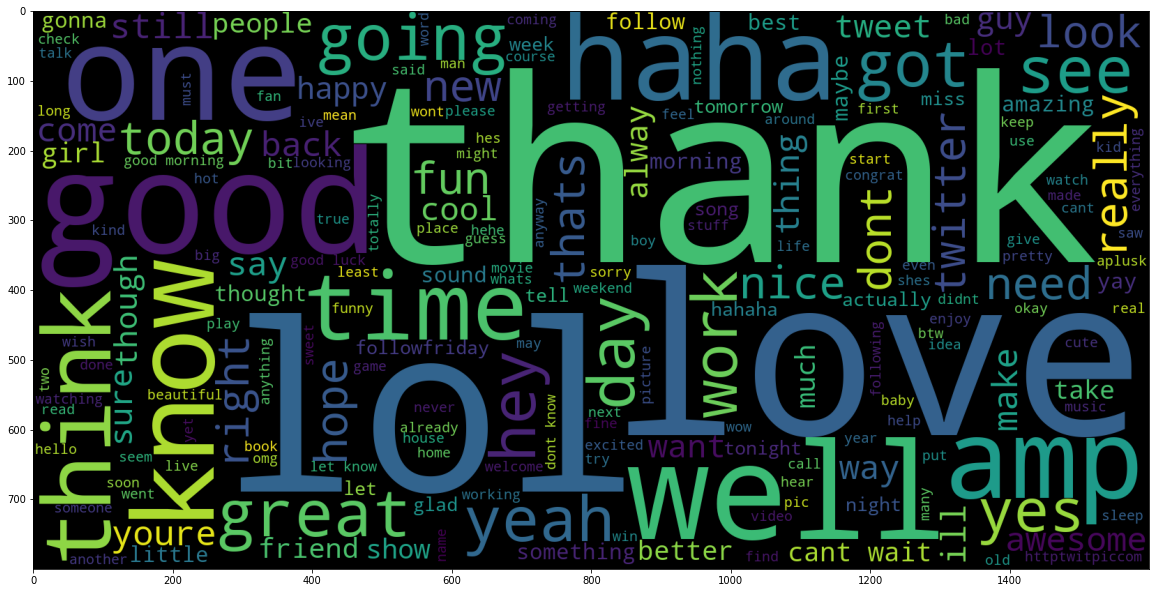

In [19]:
#word cloud for positive sentiments.
plt.figure(figsize = (20, 20)) 
wc=WordCloud( width=1600,height=800).generate(" ".join(pilani_df[pilani_df['Sentiment']==1]['Joined_clean_SentimentText']))
plt.imshow(wc)

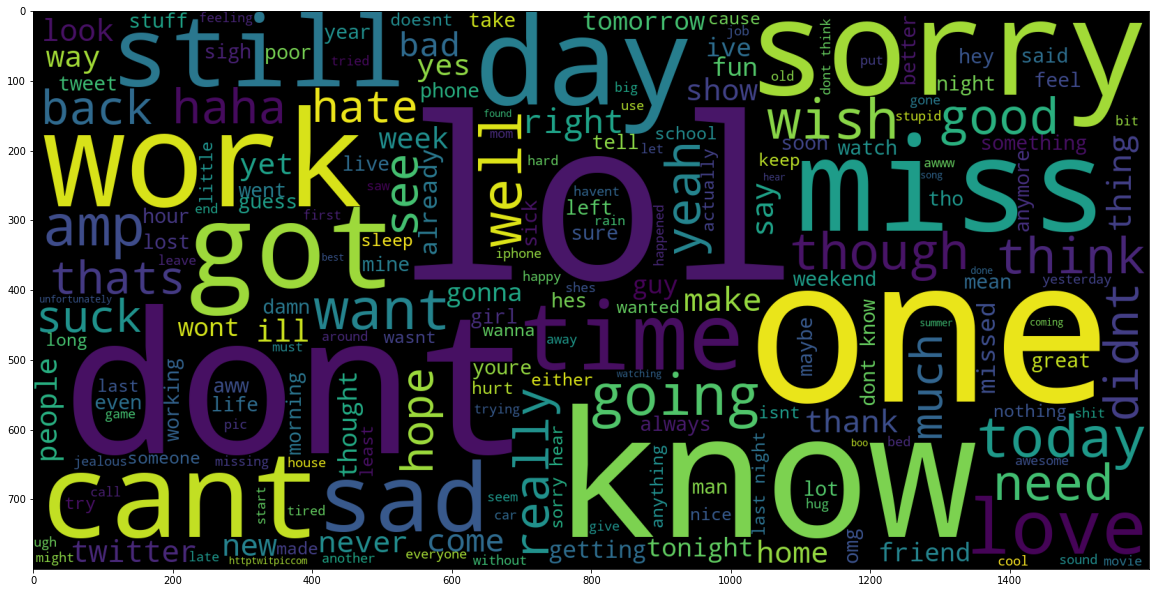

In [20]:
#word cloud for negative sentiments.
plt.figure(figsize = (20, 20)) 
wcn=WordCloud(width=1600,height=800).generate(" ".join(pilani_df[pilani_df['Sentiment']==0]['Joined_clean_SentimentText']))
plt.imshow(wcn)

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#counting number of words in each line of text.
tweets_length = [ len(nltk.word_tokenize(x)) for x in pilani_df['Joined_clean_SentimentText'] ]
tweets_length

[3,
 4,
 2,
 12,
 2,
 2,
 1,
 4,
 5,
 3,
 3,
 4,
 3,
 3,
 2,
 3,
 7,
 8,
 5,
 11,
 2,
 2,
 10,
 13,
 10,
 5,
 11,
 13,
 5,
 8,
 7,
 12,
 4,
 4,
 5,
 13,
 6,
 3,
 3,
 9,
 3,
 10,
 2,
 9,
 3,
 3,
 8,
 6,
 9,
 7,
 3,
 4,
 3,
 1,
 3,
 14,
 6,
 5,
 5,
 2,
 2,
 3,
 2,
 9,
 9,
 4,
 2,
 3,
 9,
 2,
 5,
 4,
 6,
 6,
 4,
 7,
 2,
 4,
 14,
 3,
 8,
 9,
 7,
 14,
 10,
 3,
 3,
 6,
 17,
 2,
 3,
 17,
 7,
 12,
 5,
 7,
 8,
 7,
 5,
 11,
 3,
 2,
 1,
 1,
 7,
 8,
 3,
 11,
 8,
 4,
 7,
 8,
 4,
 2,
 8,
 12,
 7,
 11,
 3,
 1,
 4,
 8,
 14,
 3,
 8,
 9,
 5,
 2,
 12,
 9,
 3,
 3,
 6,
 3,
 7,
 9,
 1,
 2,
 2,
 1,
 15,
 8,
 5,
 7,
 5,
 12,
 11,
 12,
 5,
 11,
 3,
 10,
 1,
 11,
 13,
 16,
 11,
 10,
 7,
 4,
 9,
 9,
 3,
 2,
 5,
 3,
 3,
 14,
 2,
 5,
 5,
 4,
 3,
 7,
 3,
 12,
 12,
 2,
 1,
 4,
 10,
 10,
 9,
 7,
 5,
 11,
 3,
 6,
 8,
 10,
 10,
 10,
 5,
 6,
 13,
 5,
 9,
 13,
 10,
 9,
 14,
 6,
 5,
 10,
 12,
 4,
 6,
 6,
 2,
 6,
 10,
 13,
 10,
 4,
 3,
 7,
 5,
 3,
 12,
 13,
 7,
 8,
 14,
 5,
 4,
 13,
 1,
 11,
 7,
 2,
 8,
 10,
 9,
 2,
 1,
 1

<function matplotlib.pyplot.show>

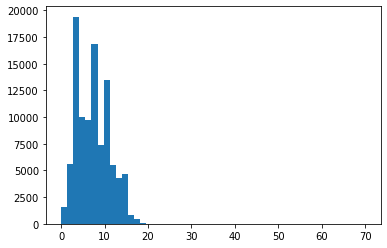

In [23]:
#distribution of tweets
plt.hist(tweets_length,bins=50)
plt.show

In [24]:
#tokenizing the dataset
list_of_words = []
for i in pilani_df['SentimentText Without Punc & Stopwords']:
  for j in i:
    list_of_words.append(j)


In [25]:
list_of_words

['sad',
 'apl',
 'friend',
 'missed',
 'new',
 'moon',
 'trailer',
 'omg',
 'already',
 'omgaga',
 'sooo',
 'gunna',
 'cry',
 'ive',
 'dentist',
 'since',
 'suposed',
 'get',
 'crown',
 'put',
 'mins',
 'think',
 'cheating',
 'worry',
 'much',
 'chillin',
 'sunny',
 'work',
 'tomorrow',
 'tonight',
 'handed',
 'uniform',
 'today',
 'miss',
 'already',
 'hmmmm',
 'wonder',
 'number',
 'must',
 'think',
 'positive',
 'thanks',
 'haters',
 'face',
 'day',
 'weekend',
 'sucked',
 'far',
 'isnt',
 'showing',
 'australia',
 'thats',
 'win',
 'way',
 'feel',
 'right',
 'awhhe',
 'man',
 'completely',
 'useless',
 'funny',
 'twitter',
 'httpmylocme',
 'feeling',
 'strangely',
 'fine',
 'gonna',
 'listen',
 'semisonic',
 'celebrate',
 'huge',
 'roll',
 'thunder',
 'nowso',
 'scary',
 'cut',
 'beard',
 'growing',
 'well',
 'year',
 'gonna',
 'start',
 'shaunamanu',
 'happy',
 'meantime',
 'sad',
 'iran',
 'wompppp',
 'wompp',
 'youre',
 'one',
 'see',
 'cause',
 'one',
 'else',
 'following',
 'y

In [26]:
#finding number of unique words
total_words = len(list(set(list_of_words)))
total_words

109996

In [27]:
#spliting model into train set and test set
X=pilani_df['SentimentText Without Punc & Stopwords']
y=pilani_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [28]:
X_test.shape

(19998,)

In [29]:
X_train.shape

(79991,)

In [30]:
X_train

89667    [clarexsaula, bit, thunder, yesterday, hid, ta...
56516    [bdjones, long, blonde, pigtails, matching, ar...
70883    [bydls, sorry, hear, weather, bouts, crappy, d...
43916                               [annaresa, dont, miss]
78776      [arielriott, nice, nice, sounds, fun, exciting]
                               ...                        
73321        [anime, sorry, didnt, realize, would, missed]
9275     [quoti, pronounce, second, class, citizensquot...
3677     [jon, amp, kate, dont, let, stupid, tabloids, ...
55353                                [barryfromwat, bored]
33646    [aimizubouken, hmm, thanks, havent, watched, s...
Name: SentimentText Without Punc & Stopwords, Length: 79991, dtype: object

In [31]:
#tokenizing with a tokenizer.
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)

#tokenizing training data
train_sequences = tokenizer.texts_to_sequences(X_train)

#tokenizing testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [32]:
train_sequences

[[13015, 142, 1832, 228, 7572, 1919],
 [29237, 101, 1872, 17860, 7573, 1752, 29238],
 [17861, 24, 86, 288, 13016, 1566, 99, 14, 570, 29239],
 [8779, 5, 36],
 [17862, 55, 55, 105, 45, 745],
 [2198, 1442, 77, 373, 1442, 91],
 [514,
  3791,
  595,
  3792,
  29240,
  106,
  904,
  80,
  726,
  582,
  1753,
  1,
  320,
  75,
  182,
  6717,
  4301,
  22,
  29241],
 [29242, 8, 146, 474, 1443, 70, 399],
 [4302, 29243, 13017],
 [7574, 95, 29244, 47, 879],
 [8780, 8, 329, 1322, 2947, 356, 1567, 13018, 29245, 17, 35, 5003, 805],
 [30, 19, 36, 1014, 345, 31, 141, 31, 619, 29246, 332],
 [122, 8781, 2, 113, 237, 2, 29, 122, 2559, 1220, 2829],
 [6009, 47, 3793, 346, 29247, 1169],
 [29248, 10, 13019, 2478, 195, 464, 373, 13020, 87, 6718, 464, 3794, 760],
 [330, 26, 723, 1379, 4],
 [7575, 12, 3, 29249, 29250, 2257, 29251, 16, 1488, 1082, 6719, 82, 204],
 [29252, 256, 397, 2638],
 [29253, 1833, 177],
 [29254, 613, 183, 1592, 33],
 [7576, 24, 135],
 [2830, 2948, 29255, 241, 5427, 29256, 204, 161],
 [1786

In [33]:
test_sequences

[[20, 908],
 [20434, 45, 1899, 1943, 23379, 253, 1843, 537],
 [9711, 12, 313, 760, 59, 1032, 780, 8203, 1281, 4188, 2326, 1064],
 [18785, 7, 89, 572, 1606, 40393, 119],
 [1701, 236, 349, 239],
 [425, 15, 1540, 1574, 7, 24, 49, 42, 1750],
 [26447, 5785, 25943, 3349, 25, 51, 134],
 [21475, 144, 16, 263, 8457, 5, 17, 27, 150, 305, 52, 1230, 218, 51],
 [5, 6, 17850, 2467, 9, 37, 136, 52, 191, 11581, 618, 3, 22784, 6745],
 [3598, 30, 81, 2, 86726, 28, 6636, 2898, 408, 9020],
 [746],
 [292, 412, 128, 178, 129],
 [139, 281],
 [40, 29, 562, 602, 128, 208, 4291, 78455],
 [1385, 329, 45, 268, 21, 226, 9, 78519, 585],
 [369, 144, 113, 2, 39],
 [16925, 7975, 31, 777, 1586, 27, 15342],
 [28, 592, 3, 5, 278, 34, 7905, 234, 16],
 [61937, 10, 23],
 [72011, 114, 567],
 [37332, 226, 1813, 266, 1951, 2445, 423, 3619],
 [11529, 1322, 7],
 [428, 330, 25, 59209, 289, 11675, 72, 25, 59209, 203],
 [54341, 188, 2, 6585, 66, 3645, 277, 158, 482, 26, 112],
 [6625, 960, 320, 1618, 228, 53],
 [92497, 383, 332, 132

In [34]:
#padding on the training and testing sequences
padded_train= pad_sequences(train_sequences,maxlen=15,padding='post',truncating='post')
padded_test=pad_sequences(test_sequences,maxlen=15,truncating='post')

In [35]:
#changing data to 2D representation.
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [36]:
y_test_cat.shape

(19998, 2)

In [37]:
y_train_cat.shape

(79991, 2)

In [38]:
y_test_cat

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [39]:
#creating a training model
model = Sequential()

model.add(Embedding(total_words,output_dim = 512))
model.add(LSTM(256))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         56317952  
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 57,138,562
Trainable params: 57,138,562
Non-trainable params: 0
_________________________________________________________________


In [40]:
#training the model
model.fit(padded_train,y_train_cat,batch_size=32,validation_split=0.2,epochs=2)

Epoch 1/2
2000/2000 [==============================] - 1437s 717ms/step - loss: 0.5783 - acc: 0.6830 - val_loss: 0.5142 - val_acc: 0.7505
Epoch 2/2
2000/2000 [==============================] - 1416s 708ms/step - loss: 0.2960 - acc: 0.8785 - val_loss: 0.6235 - val_acc: 0.7278


In [41]:
#making predictions
pred = model.predict(padded_test)

In [42]:
prediction=[]
for i in pred:
  prediction.append(np.argmax(i))

In [43]:
prediction

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,


In [44]:
#original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [45]:
#accuracy score of the model.
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(original,prediction)
accuracy

0.682068206820682

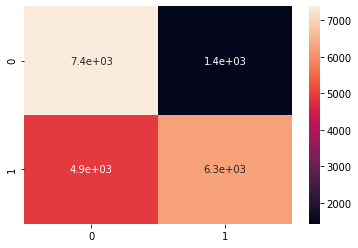

In [46]:
#ploting the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original,prediction)
sns.heatmap(cm,annot=True)